In [58]:
!pip install pandas

# Import Libraries

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset

In [64]:
bengaluru_df = pd.read_csv('bengaluru_house_prices.csv')

In [66]:
bengaluru_df.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00

In [68]:
bengaluru_df.tail()

area_type   availability               location       size  \
13315        Built-up  Area  Ready To Move             Whitefield  5 Bedroom   
13316  Super built-up  Area  Ready To Move          Richards Town      4 BHK   
13317        Built-up  Area  Ready To Move  Raja Rajeshwari Nagar      2 BHK   
13318  Super built-up  Area         18-Jun        Padmanabhanagar      4 BHK   
13319  Super built-up  Area  Ready To Move           Doddathoguru      1 BHK   

       society total_sqft  bath  balcony  price  
13315  ArsiaEx       3453   4.0      0.0  231.0  
13316      NaN       3600   5.0      NaN  400.0  
13317  Mahla T       1141   2.0      1.0   60.0  
13318  SollyCl       4689   4.0      1.0  488.0  
13319      NaN        550   1.0      1.0   17.0

# Dataset Analysis, Cleaning and Wrangling of the dataset

In [71]:
bengaluru_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [73]:
bengaluru_df.describe()

bath       balcony         price
count  13247.000000  12711.000000  13320.000000
mean       2.692610      1.584376    112.565627
std        1.341458      0.817263    148.971674
min        1.000000      0.000000      8.000000
25%        2.000000      1.000000     50.000000
50%        2.000000      2.000000     72.000000
75%        3.000000      2.000000    120.000000
max       40.000000      3.000000   3600.000000

In [75]:
# I will drop the column society because it has a large missing data and of course not valuable for analysis
bengaluru_df2 = bengaluru_df.drop(['society','area_type', 'availability'], axis = 'columns')
bengaluru_df2.shape

(13320, 6)

In [77]:
# check for other missing value on the dataset
bengaluru_df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [79]:
# drop na value rows from the dataset they're less % of value missing
bengaluru_df3 = bengaluru_df2.dropna()
bengaluru_df3.shape

(12710, 6)

In [81]:
bengaluru_df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [83]:
bengaluru_df3.head()

location       size total_sqft  bath  balcony   price
0  Electronic City Phase II      2 BHK       1056   2.0      1.0   39.07
1          Chikka Tirupathi  4 Bedroom       2600   5.0      3.0  120.00
2               Uttarahalli      3 BHK       1440   2.0      3.0   62.00
3        Lingadheeranahalli      3 BHK       1521   3.0      1.0   95.00
4                  Kothanur      2 BHK       1200   2.0      1.0   51.00

### we will have to do a value count for  total_sqft column because from my observations 
1. It is combined or mixed with float number
2. range of number eg. 2000 - 2800
3. it has strings attached as well
we will also use the split (-) method to allign it to numerical column 

In [103]:
# to show all the columns and rows
#pd.set_option("display.max_columns", None)
#pd.set_option("display.max_rows", None)
# to show the whole column data in total_sqft
bengaluru_df3['total_sqft'].value_counts()

total_sqft
1200                 788
1100                 218
1500                 198
2400                 177
600                  172
1000                 170
1350                 130
1050                 122
1300                 115
1250                 110
900                  108
1400                 105
1600                  99
1150                  98
1800                  98
1140                  91
2000                  78
1450                  69
1075                  66
1650                  63
1020                  62
800                   62
1125                  60
3000                  60
1160                  60
1550                  59
1180                  58
2500                  57
950                   57
1255                  56
1260                  56
1700                  56
1080                  55
1220                  55
1070                  53
750                   49
700                   48
1175                  47
1225                  47
1320          

In [87]:
def convert_sqft_to_num(value):
    try:
        # Check for range and calculate the average
        if '-' in value:
            parts = list(map(float, value.split('-')))
            return sum(parts) / 2
        
        # Extract numeric part if the value contains text
        numeric_part = ''.join(char for char in value if char.isdigit() or char == '.')
        if numeric_part:  # Ensure there's something to convert
            return float(numeric_part)
        
        # If it's already a number in string form, convert to float
        return float(value)
    except:
        # Return np.nan for unprocessable entries
        return np.nan


In [91]:
bengaluru_df4 = bengaluru_df3.copy()
bengaluru_df4['total_sqft'] = bengaluru_df3['total_sqft'].apply(convert_sqft_to_num)

In [93]:
bengaluru_df4.head()

location       size  total_sqft  bath  balcony   price
0  Electronic City Phase II      2 BHK      1056.0   2.0      1.0   39.07
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0      3.0  120.00
2               Uttarahalli      3 BHK      1440.0   2.0      3.0   62.00
3        Lingadheeranahalli      3 BHK      1521.0   3.0      1.0   95.00
4                  Kothanur      2 BHK      1200.0   2.0      1.0   51.00

In [105]:
bengaluru_df4['total_sqft'].value_counts()

total_sqft
1200.000     788
1100.000     219
1500.000     200
2400.000     177
1000.000     172
600.000      172
1350.000     130
1050.000     122
1300.000     115
1250.000     110
900.000      108
1400.000     105
1600.000      99
1800.000      98
1150.000      98
1140.000      91
2000.000      78
1450.000      70
1075.000      66
1650.000      63
800.000       63
1020.000      62
1125.000      60
3000.000      60
1160.000      60
1550.000      59
2500.000      58
1180.000      58
1260.000      57
950.000       57
1700.000      57
1255.000      56
1080.000      55
1220.000      55
1070.000      53
750.000       49
700.000       49
1225.000      47
1175.000      47
1320.000      46
1060.000      45
1240.000      45
1210.000      44
1230.000      44
850.000       43
2100.000      42
4000.000      41
1185.000      40
1270.000      40
1190.000      40
1410.000      40
1280.000      39
1170.000      39
1330.000      38
1025.000      38
1750.000      38
1290.000      37
1310.000      37
119

In [115]:
bengaluru_df4.location = bengaluru_df4.location.apply(lambda x:x.strip())
location_stat = bengaluru_df4['location'].value_counts (ascending= False)
location_stat

location
Whitefield                                            515
Sarjapur  Road                                        372
Electronic City                                       302
Kanakpura Road                                        261
Thanisandra                                           234
Yelahanka                                             206
Uttarahalli                                           186
Hebbal                                                173
Raja Rajeshwari Nagar                                 168
Marathahalli                                          164
7th Phase JP Nagar                                    147
Bannerghatta Road                                     144
Hennur Road                                           142
Haralur Road                                          135
Electronic City Phase II                              130
Rajaji Nagar                                           99
Chandapura                                             98
Bella

In [117]:
location_stat.values.sum()

12710

In [121]:
len(location_stat[location_stat>10])

237

In [123]:
len(location_stat)

1254

In [127]:
bengaluru_df4['size'].value_counts()

size
2 BHK         5152
3 BHK         4128
4 Bedroom      749
1 BHK          530
3 Bedroom      527
4 BHK          489
2 Bedroom      328
5 Bedroom      263
6 Bedroom      169
1 Bedroom      105
7 Bedroom       69
8 Bedroom       65
5 BHK           36
9 Bedroom       29
6 BHK           23
7 BHK           16
1 RK            13
9 BHK            5
8 BHK            3
10 Bedroom       3
11 Bedroom       2
11 BHK           1
27 BHK           1
43 Bedroom       1
14 BHK           1
12 Bedroom       1
13 BHK           1
Name: count, dtype: int64

In [129]:
# The size column is a categorical data. It comprises of numeric data and string data
# we will extract the numeric part from 'size column' i.e. "2BHK" to 2
bengaluru_df4['bhk'] = bengaluru_df4['size'].apply(lambda x: int(x.split(' ')[0]))
bengaluru_df4.bhk.unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

In [131]:
bengaluru_df4.head()

location       size  total_sqft  bath  balcony   price  bhk
0  Electronic City Phase II      2 BHK      1056.0   2.0      1.0   39.07    2
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0      3.0  120.00    4
2               Uttarahalli      3 BHK      1440.0   2.0      3.0   62.00    3
3        Lingadheeranahalli      3 BHK      1521.0   3.0      1.0   95.00    3
4                  Kothanur      2 BHK      1200.0   2.0      1.0   51.00    2

In [133]:
bengaluru_df4.tail()

location       size  total_sqft  bath  balcony  price  bhk
13314      Green Glen Layout      3 BHK      1715.0   3.0      3.0  112.0    3
13315             Whitefield  5 Bedroom      3453.0   4.0      0.0  231.0    5
13317  Raja Rajeshwari Nagar      2 BHK      1141.0   2.0      1.0   60.0    2
13318        Padmanabhanagar      4 BHK      4689.0   4.0      1.0  488.0    4
13319           Doddathoguru      1 BHK       550.0   1.0      1.0   17.0    1

In [135]:
print(bengaluru_df4.isnull().sum())

location       0
size           0
total_sqft    11
bath           0
balcony        0
price          0
bhk            0
dtype: int64


In [137]:
# Drop missing rows in the total_sqft
bengaluru_df5 = bengaluru_df4.dropna(subset=['total_sqft'])
bengaluru_df5.shape

(12699, 7)

In [139]:
print(bengaluru_df5.isnull().sum())

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
bhk           0
dtype: int64


## Dictate and Remove Outliers 

In [279]:
# Generating shape for the boxplot for the outliers
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

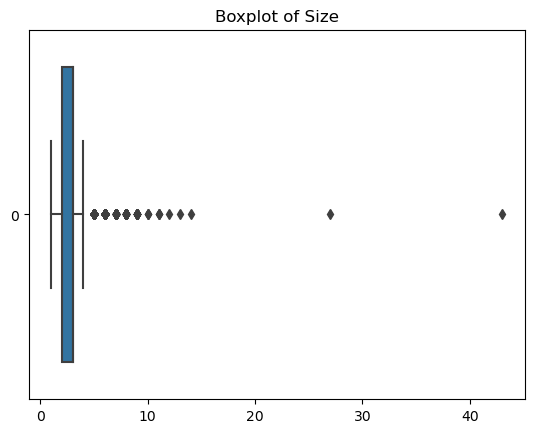

In [141]:
sns.boxplot(data=bengaluru_df5['bhk'], orient = 'h')
plt.title('Boxplot of Size')
plt.show()

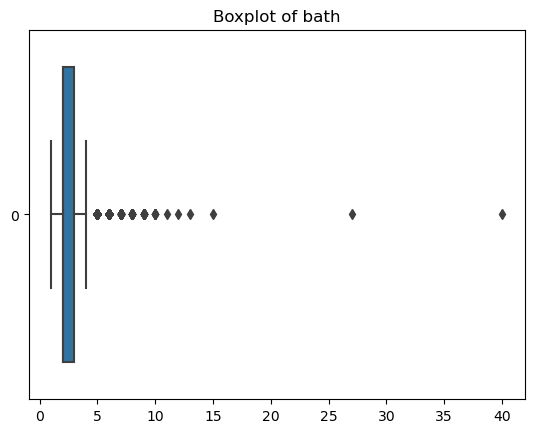

In [143]:
sns.boxplot(data=bengaluru_df5['bath'], orient = 'h')
plt.title('Boxplot of bath')
plt.show()

In [145]:
# Drop outliers in the bath column 
outliers_bath = bengaluru_df5[bengaluru_df5["bath"] > 25].index

In [147]:
print("Number of outliers removed: ", len(outliers_bath))

Number of outliers removed:  2


In [149]:
bengaluru_df6 = bengaluru_df5.drop(outliers_bath)

In [151]:
print(bengaluru_df6.shape)

(12697, 7)


Text(0, 0.5, 'Count')

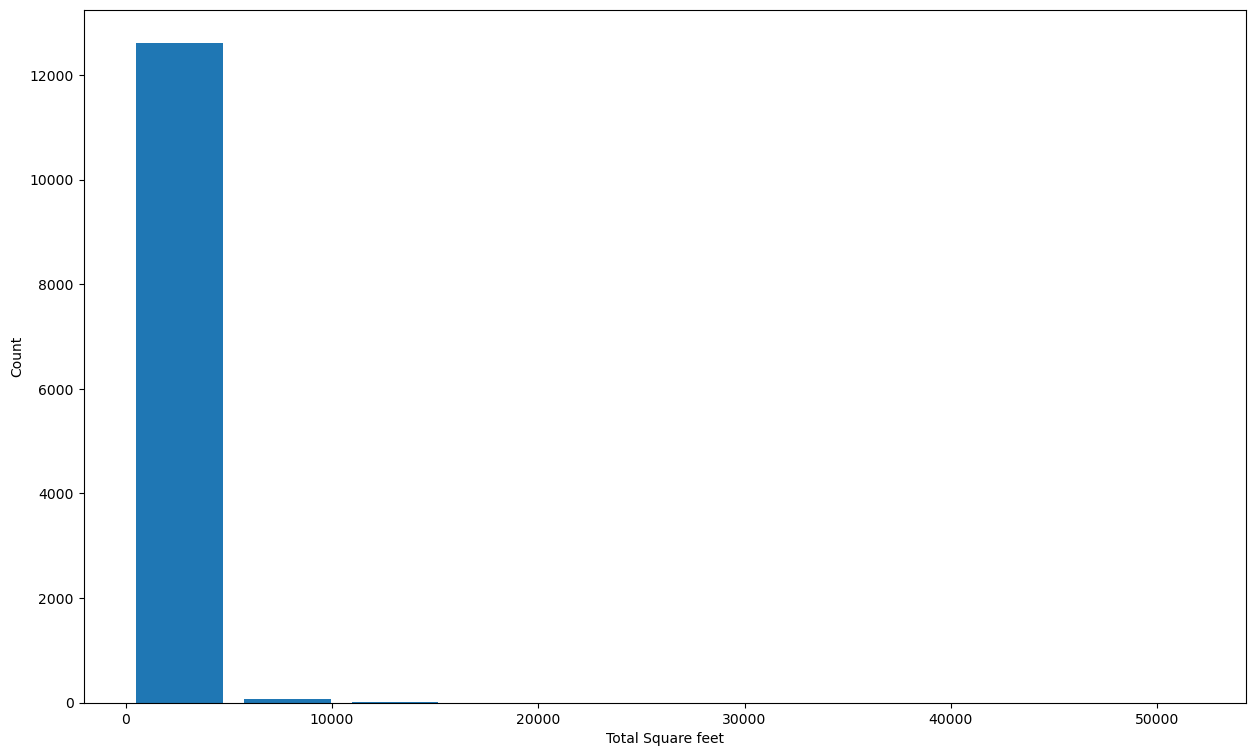

In [157]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15, 9)
plt.hist(bengaluru_df6.total_sqft, rwidth = 0.8)
plt.xlabel("Total Square feet")
plt.ylabel('Count')

In [161]:
# create new feature that is price_per_squre_feet this will it help to find the outliers

#To get this we will be dividing price by total_sqft
bengaluru_df6['price_per_sqft'] = bengaluru_df6['price']*100000 / bengaluru_df6['total_sqft']  
bengaluru_df6.head()

location       size  total_sqft  bath  balcony   price  \
0  Electronic City Phase II      2 BHK      1056.0   2.0      1.0   39.07   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0      3.0  120.00   
2               Uttarahalli      3 BHK      1440.0   2.0      3.0   62.00   
3        Lingadheeranahalli      3 BHK      1521.0   3.0      1.0   95.00   
4                  Kothanur      2 BHK      1200.0   2.0      1.0   51.00   

   bhk  price_per_sqft  
0    2     3699.810606  
1    4     4615.384615  
2    3     4305.555556  
3    3     6245.890861  
4    2     4250.000000

In [163]:
# getting the statistics of the price_per_sqft
bengaluru_df_statistic = bengaluru_df6['price_per_sqft'].describe()
bengaluru_df_statistic

count    1.269700e+04
mean     1.146006e+04
std      2.051443e+05
min      2.678298e+02
25%      4.250000e+03
50%      5.382436e+03
75%      7.166667e+03
max      1.600000e+07
Name: price_per_sqft, dtype: float64

In [165]:
location_statistics = bengaluru_df6['location'].value_counts()
location_statistics

location
Whitefield                                            515
Sarjapur  Road                                        372
Electronic City                                       302
Kanakpura Road                                        261
Thanisandra                                           234
Yelahanka                                             206
Uttarahalli                                           186
Hebbal                                                173
Raja Rajeshwari Nagar                                 168
Marathahalli                                          164
7th Phase JP Nagar                                    147
Bannerghatta Road                                     144
Hennur Road                                           142
Haralur Road                                          135
Electronic City Phase II                              130
Rajaji Nagar                                           99
Chandapura                                             98
Bella

In [167]:
location_statistics.values.sum()

12697

In [169]:
len(location_statistics)

1253

In [171]:
len(location_statistics[location_statistics<=10])

1016

In [173]:
len(location_statistics[location_statistics>10])

237

In [175]:
bengaluru_df6.to_csv('cleaned2_bengaluru_house_prices.csv', index=False)

In [177]:
# Removing outliers by help of 'price_per_sqft' implementing standard deviation and mean per location of the house area
def remove_pps_outliers(bengaluru_df):
  bengaluru_df_out = pd.DataFrame()
  for key, subdf in bengaluru_df.groupby('location'):
    m=np.mean(subdf.price_per_sqft)
    st=np.std(subdf.price_per_sqft)
    reduced_df = subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
    bengaluru_df_out = pd.concat([bengaluru_df_out, reduced_df], ignore_index = True)
  return bengaluru_df_out

bengaluru_df6 = remove_pps_outliers(bengaluru_df6)
bengaluru_df6.shape

(9741, 8)

In [179]:
bengaluru_df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9741 entries, 0 to 9740
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        9741 non-null   object 
 1   size            9741 non-null   object 
 2   total_sqft      9741 non-null   float64
 3   bath            9741 non-null   float64
 4   balcony         9741 non-null   float64
 5   price           9741 non-null   float64
 6   bhk             9741 non-null   int64  
 7   price_per_sqft  9741 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 608.9+ KB


In [181]:
bengaluru_df6[['location', 'size']]

location        size
0                    1st Block BEL Layout       3 BHK
1                    1st Block HBR Layout       1 BHK
2                    1st Block HBR Layout       4 BHK
3                   1st Block HRBR Layout   8 Bedroom
4                   1st Block HRBR Layout   7 Bedroom
5                   1st Block HRBR Layout   3 Bedroom
6                   1st Block HRBR Layout   3 Bedroom
7                   1st Block HRBR Layout   3 Bedroom
8                     1st Block Jayanagar       4 BHK
9                     1st Block Jayanagar       3 BHK
10                    1st Block Jayanagar       6 BHK
11                    1st Block Jayanagar       3 BHK
12                    1st Block Jayanagar   7 Bedroom
13                    1st Block Jayanagar       3 BHK
14                    1st Block Jayanagar       2 BHK
15                    1st Block Jayanagar       4 BHK
16                    1st Block Jayanagar       4 BHK
17                  1st Block Koramangala       2 BHK
18                  1st Block Koramangala       2 BHK
19                  1st Block Koramangala       4 BHK
20                  1st Block Koramangala       3 BHK
21                  1st Block Koramangala       4 BHK
22                     1st Phase JP Nagar       4 BHK
23                     1st Phase JP Nagar       3 BHK
24                     1st Phase JP Nagar       3 BHK
25                     1st Phase JP Nagar       3 BHK
26                     1st Phase JP Nagar       2 BHK
27                     1st Phase JP Nagar       2 BHK
28                     1st Phase JP Nagar   2 Bedroom
29                     1st Phase JP Nagar       1 BHK
30                     1st Phase JP Nagar       3 BHK
31                     1st Phase JP Nagar       3 BHK
32                     1st Phase JP Nagar       2 BHK
33                     1st Phase JP Nagar       2 BHK
34                     1st Phase JP Nagar       3 BHK
35                     1st Phase JP Nagar       2 BHK
36                     1st Phase JP Nagar       4 BHK
37                     1st Phase JP Nagar       2 BHK
38                 1st Stage Indira Nagar       2 BHK
39                 1st Stage Indira Nagar       2 BHK
40                 1st Stage Indira Nagar       2 BHK
41                 1st Stage Indira Nagar       4 BHK
42                  2nd Block Hrbr Layout       3 BHK
43                  2nd Block Hrbr Layout       3 BHK
44                  2nd Block Hrbr Layout       3 BHK
45                  2nd Block Hrbr Layout   4 Bedroom
46                    2nd Block Jayanagar       3 BHK
47                    2nd Block Jayanagar       2 BHK
48                     2nd Phase JP Nagar       5 BHK
49                     2nd Phase JP Nagar       2 BHK
50                     2nd Phase JP Nagar   8 Bedroom
51                     2nd Phase JP Nagar   3 Bedroom
52                     2nd Phase JP Nagar       2 BHK
53                     2nd Phase JP Nagar       2 BHK
54              2nd Phase Judicial Layout       3 BHK
55              2nd Phase Judicial Layout       2 BHK
56              2nd Phase Judicial Layout       3 BHK
57              2nd Phase Judicial Layout       3 BHK
58              2nd Phase Judicial Layout       2 BHK
59              2nd Phase Judicial Layout       3 BHK
60              2nd Phase Judicial Layout       3 BHK
61              2nd Phase Judicial Layout       2 BHK
62          2nd Stage Arekere Mico Layout   4 Bedroom
63                   2nd Stage Nagarbhavi   4 Bedroom
64                   2nd Stage Nagarbhavi   6 Bedroom
65                   2nd Stage Nagarbhavi   6 Bedroom
66                   2nd Stage Nagarbhavi   4 Bedroom
67                   2nd Stage Nagarbhavi   4 Bedroom
68                   2nd Stage Nagarbhavi   5 Bedroom
69                   2nd Stage Nagarbhavi   4 Bedroom
70                   2nd Stage Nagarbhavi   3 Bedroom
71                   2nd Stage Nagarbhavi   4 Bedroom
72                   2nd Stage Nagarbhavi   4 Bedroom
73                   2nd Stage Nagarb

In [183]:
print(bengaluru_df6[['total_sqft', 'price']].isnull().sum())

total_sqft    0
price         0
dtype: int64


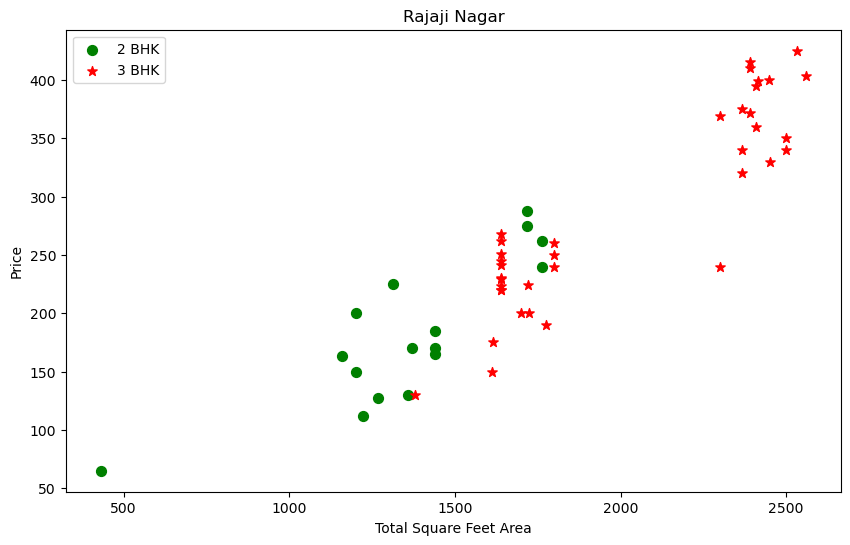

In [185]:
# CHECK FOR OUTLIERS OF A PARTICULAR LOCATION BASE ON PROPERTY SIZE E.G. 2 BHK AND 3 BHK PROPERTY 
# in below scatterplot we observe that at same location price of
# 2 bhk house is greater than 3 bhk so it is outlier

def plot_scatter_chart(df,location):
  bhk2 = df[(df.location==location) & (df.bhk==2)]
  bhk3 = df[(df.location==location) & (df.bhk==3)]
  plt.figure(figsize=(10,6))
  plt.scatter(bhk2.total_sqft, bhk2.price, color='Green', label='2 BHK', s=50)
  plt.scatter(bhk3.total_sqft, bhk3.price, color='Red', label='3 BHK', s=50, marker="*")
  plt.xlabel("Total Square Feet Area")
  plt.ylabel("Price")
  plt.title(location)
  plt.legend()

plot_scatter_chart(bengaluru_df6, "Rajaji Nagar")

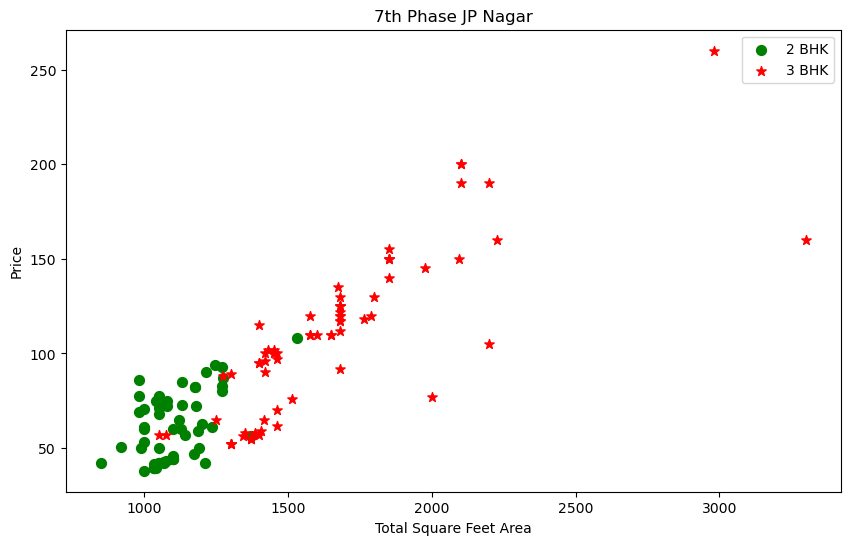

In [187]:
plot_scatter_chart(bengaluru_df6, "7th Phase JP Nagar")
# in below scatterplot we observe that at same location price of
# 3 bhk house is less than 2 bhk so it is outlier

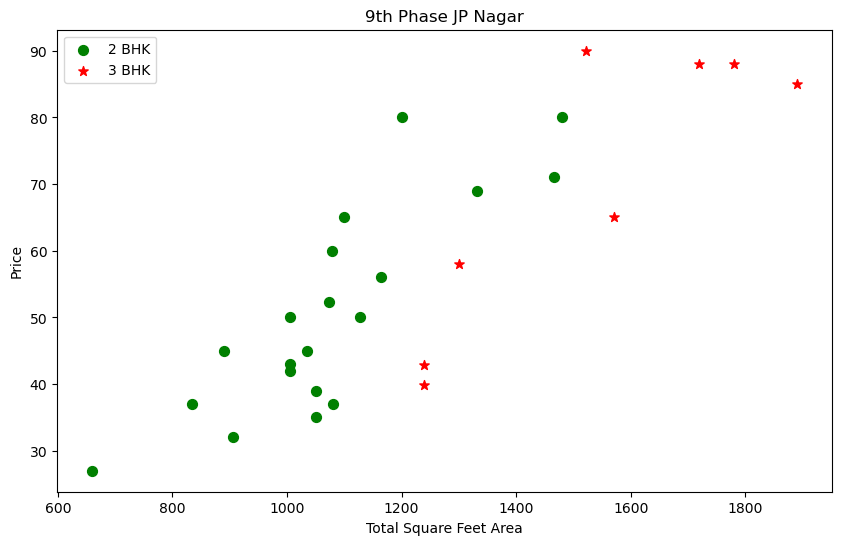

In [189]:
plot_scatter_chart(bengaluru_df6, "9th Phase JP Nagar") # same as in this location

In [201]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            mean_price = np.mean(bhk_df.price_per_sqft)
            std_price = np.std(bhk_df.price_per_sqft)
            
            bhk_stats[bhk] = {
                'mean_price': mean_price,
                'std_price': std_price,
                'count': bhk_df.shape[0],
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk - 1)
            if stats and stats['count'] > 5:
                condition = bhk_df.price_per_sqft < stats['mean_price']
                exclude_indices = np.append(
                    exclude_indices,
                    bhk_df[condition].index.values,
                )
    return df.drop(exclude_indices, axis='index')

bengaluru_df6 = remove_bhk_outliers(bengaluru_df6)


In [203]:
bengaluru_df6.shape

(7830, 8)

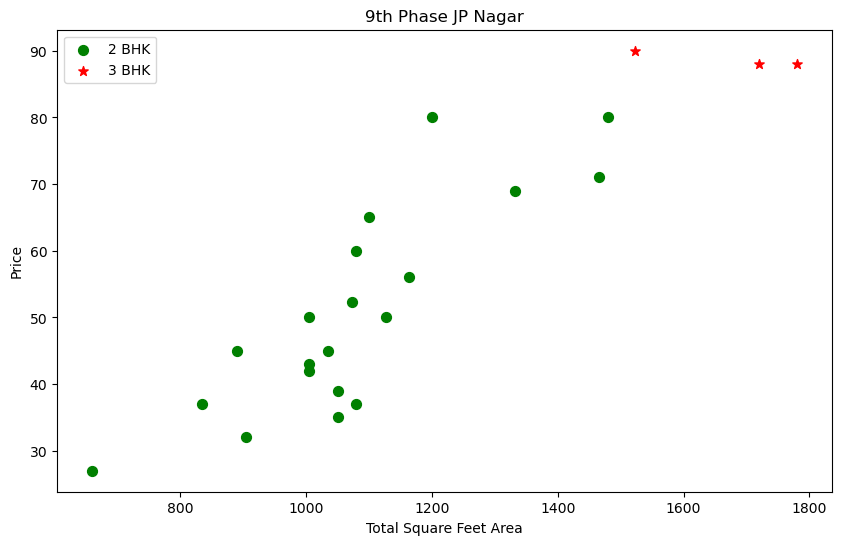

In [205]:
plot_scatter_chart(bengaluru_df6, "9th Phase JP Nagar")

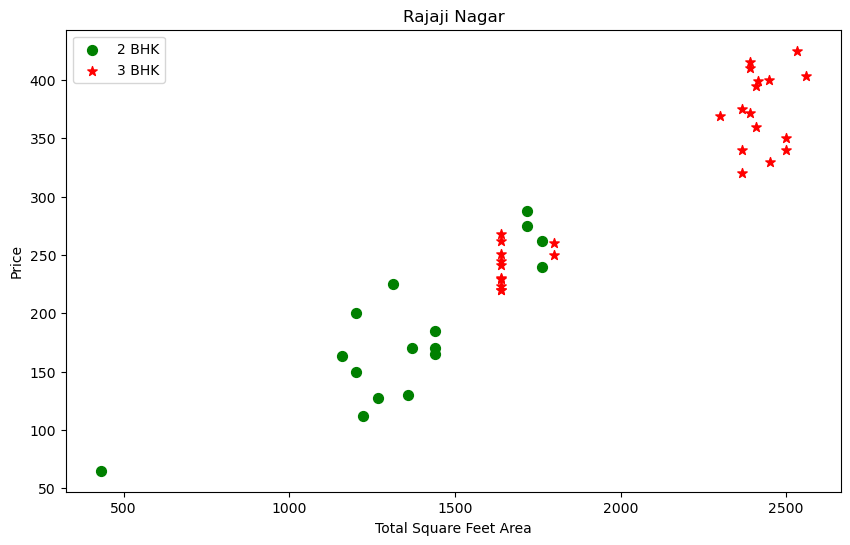

In [207]:
plot_scatter_chart(bengaluru_df6, "Rajaji Nagar")

In [209]:
# Removing outliers using bath. Considering the number of bathrooms more than the bedroom
bengaluru_df6.bath.unique()

array([ 3.,  1.,  4.,  7.,  6.,  2.,  5.,  8.,  9., 10.])

In [211]:
bengaluru_df6[bengaluru_df6.bath > bengaluru_df6.bhk+2]

location       size  total_sqft  bath  balcony   price  bhk  \
1875         Chamrajpet  6 Bedroom      1500.0   9.0      3.0   230.0    6   
2037      Chikkabanavar  4 Bedroom      2460.0   7.0      2.0    80.0    4   
7698  Sathya Sai Layout      6 BHK     11338.0   9.0      1.0  1000.0    6   
8285        Thanisandra      3 BHK      1806.0   6.0      2.0   116.0    3   

      price_per_sqft  
1875    15333.333333  
2037     3252.032520  
7698     8819.897689  
8285     6423.034330

In [213]:
# The condition below filters rows where the number of bathrooms (bath) is less than the number of bedrooms (bhk) plus 2.
bengaluru_df6 = bengaluru_df6[bengaluru_df6.bath < bengaluru_df6.bhk+2]
bengaluru_df6.shape

(7751, 8)

In [215]:
bengaluru_df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7751 entries, 0 to 9740
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        7751 non-null   object 
 1   size            7751 non-null   object 
 2   total_sqft      7751 non-null   float64
 3   bath            7751 non-null   float64
 4   balcony         7751 non-null   float64
 5   price           7751 non-null   float64
 6   bhk             7751 non-null   int64  
 7   price_per_sqft  7751 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 545.0+ KB


In [343]:
bengaluru_df.head()

area_type   availability              location   size  \
0  Super built-up  Area  Ready To Move   Devarabeesana Halli  3 BHK   
1        Built-up  Area  Ready To Move   Devarabeesana Halli  3 BHK   
2  Super built-up  Area  Ready To Move   Devarabeesana Halli  3 BHK   
3  Super built-up  Area         18-May   Devarachikkanahalli  3 BHK   
4  Super built-up  Area  Ready To Move   Devarachikkanahalli  2 BHK   

   total_sqft  bath  balcony  price  bhk  price_per_sqft  
0      1672.0   3.0      2.0  150.0    3     8971.291866  
1      1750.0   3.0      3.0  149.0    3     8514.285714  
2      1750.0   3.0      2.0  150.0    3     8571.428571  
3      1250.0   2.0      3.0   44.0    3     3520.000000  
4      1250.0   2.0      2.0   40.0    2     3200.000000

In [217]:
num_var = bengaluru_df6.select_dtypes(include=['float64', 'int64']).columns.tolist()

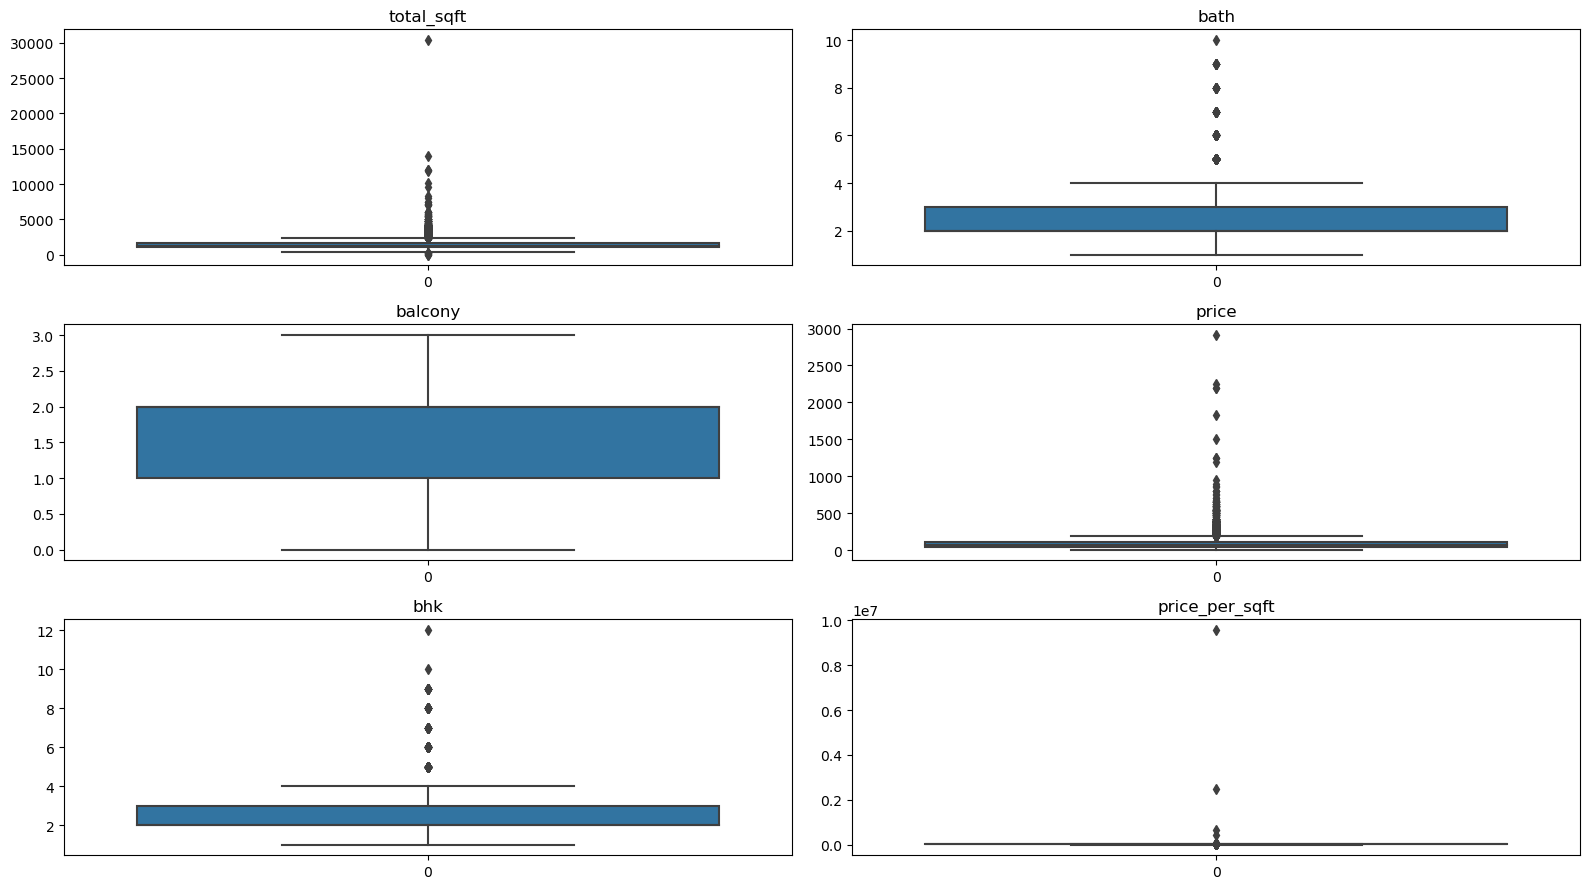

In [219]:
plt.figure(figsize=(16, 9))
for i, var in enumerate(num_var):
    plt.subplot(3, 2, i + 1)  # Adjust the grid layout if needed
    sns.boxplot(bengaluru_df6[var])
    plt.title(var)  # Optional: Add titles to subplots
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [221]:
bengaluru_df6.head()

location       size  total_sqft  bath  balcony  price  bhk  \
0   1st Block BEL Layout      3 BHK      1540.0   3.0      2.0   85.0    3   
1   1st Block HBR Layout      1 BHK       600.0   1.0      0.0   45.0    1   
2   1st Block HBR Layout      4 BHK      3150.0   4.0      2.0  150.0    4   
3  1st Block HRBR Layout  8 Bedroom      1200.0   7.0      0.0  235.0    8   
4  1st Block HRBR Layout  7 Bedroom      2400.0   7.0      3.0  355.0    7   

   price_per_sqft  
0     5519.480519  
1     7500.000000  
2     4761.904762  
3    19583.333333  
4    14791.666667

In [223]:
avg_price_location = bengaluru_df6.groupby('location')['price'].mean().sort_values(ascending=False)

In [225]:
avg_price_location

location
Ashok Nagar                            2912.000000
Srinivas Colony                         943.000000
Cunningham Road                         744.555556
Sadashiva Nagar                         737.500000
Kathreguppe                             725.000000
Hunasamaranahalli                       675.000000
Prashanth Nagar                         600.000000
Sector 6 HSR Layout                     580.000000
Palanahalli                             550.000000
Shetty Halli                            550.000000
Thanisandra main road                   549.000000
Church Street                           536.000000
Sadanand Nagar                          500.000000
south                                   480.000000
CQAL Layout                             475.000000
Vasanth nagar                           457.000000
Vaishnavi Layout                        420.000000
7th Block Jayanagar                     409.666667
HAL 2nd Stage                           402.500000
Byadarahalli          

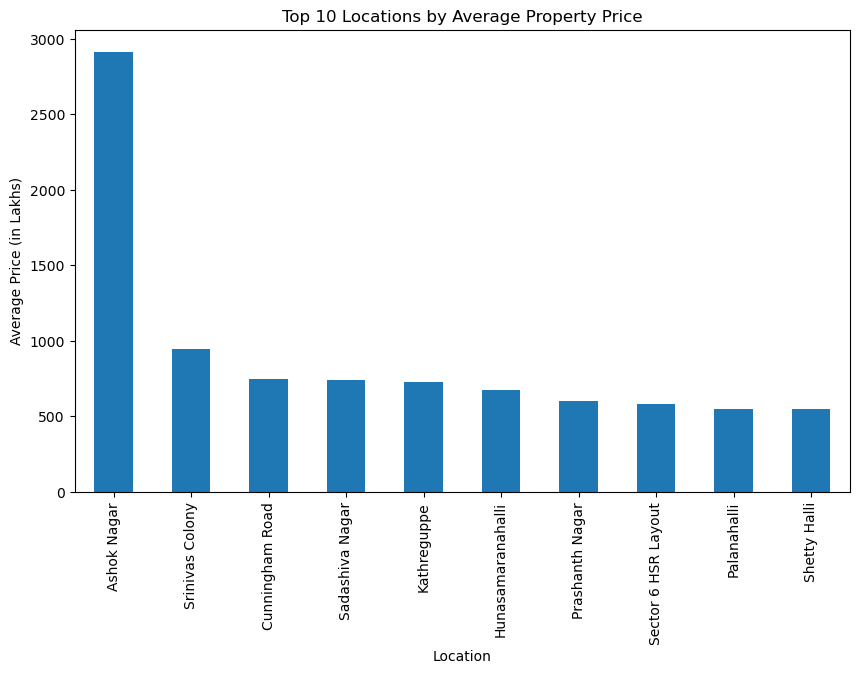

In [227]:
avg_price_location.head(10).plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Locations by Average Property Price')
plt.ylabel('Average Price (in Lakhs)')
plt.xlabel('Location')
plt.show()

In [229]:
# We will be dropping some columns that are not very relevant for machine learning
bengaluru_df6 = bengaluru_df6.drop(["price_per_sqft"], axis =1)
bengaluru_df6.head()

location       size  total_sqft  bath  balcony  price  bhk
0   1st Block BEL Layout      3 BHK      1540.0   3.0      2.0   85.0    3
1   1st Block HBR Layout      1 BHK       600.0   1.0      0.0   45.0    1
2   1st Block HBR Layout      4 BHK      3150.0   4.0      2.0  150.0    4
3  1st Block HRBR Layout  8 Bedroom      1200.0   7.0      0.0  235.0    8
4  1st Block HRBR Layout  7 Bedroom      2400.0   7.0      3.0  355.0    7

# Machine Learning: Encoding and Predicting Model

In [231]:
# Encoding the categotical datas in the dataset using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Apply One-Hot Encoding
encoded_df = pd.get_dummies(bengaluru_df6.location)
encoded_df = encoded_df.astype(int)
encoded_df.head()

1st Block BEL Layout  1st Block HBR Layout  1st Block HRBR Layout  \
0                     1                     0                      0   
1                     0                     1                      0   
2                     0                     1                      0   
3                     0                     0                      1   
4                     0                     0                      1   

   1st Block Jayanagar  1st Block Koramangala  1st Phase JP Nagar  \
0                    0                      0                   0   
1                    0                      0                   0   
2                    0                      0                   0   
3                    0                      0                   0   
4                    0                      0                   0   

   1st Stage Indira Nagar  2nd Block Hrbr Layout  2nd Block Jayanagar  \
0                       0                      0                    0   
1                       0                      0                    0   
2                       0                      0                    0   
3                       0                      0                    0   
4                       0                      0                    0   

   2nd Phase JP Nagar  2nd Phase Judicial Layout  \
0                   0                          0   
1                   0                          0   
2                   0                          0   
3                   0                          0   
4                   0                          0   

   2nd Stage Arekere Mico Layout  2nd Stage Nagarbhavi  \
0                              0                     0   
1                              0                     0   
2                              0                     0   
3                              0                     0   
4                              0                     0   

   3rd Block Banashankari  3rd Block Hrbr Layout  3rd Block Jayanagar  \
0                       0                      0                    0   
1                       0                      0                    0   
2                       0                      0                    0   
3                       0                      0                    0   
4                       0                      0                    0   

   3rd Block Koramangala  3rd Phase JP Nagar  4th Block Jayanagar  \
0                      0                   0                    0   
1                      0                   0                    0   
2                      0                   0                    0   
3                      0                   0                    0   
4                      0                   0                    0   

   4th Block Koramangala  4th Phase JP Nagar  4th T block Jayanagar  \
0                      0                   0                      0   
1                      0                   0                      0   
2                      0                   0                      0   
3                      0                   0                      0   
4                      0                   0                      0   

   5th Block Hbr Layout  5th Block Jayanagar  5th Phase JP Nagar  \
0                     0                    0                   0   
1                     0                    0                   0   
2                     0                    0                   0   
3                     0                    0                   0   
4                     0                    0                   0   

   6th Phase JP Nagar  6th block Koramangala  7th Block Jayanagar  \
0                   0                      0                    0   
1                   0                      0                    0   
2                   0                      0                    0   
3                   0                      0                    0   
4                  

In [237]:
encoded_df.columns

Index(['1st Block BEL Layout', '1st Block HBR Layout', '1st Block HRBR Layout',
       '1st Block Jayanagar', '1st Block Koramangala', '1st Phase JP Nagar',
       '1st Stage Indira Nagar', '2nd Block Hrbr Layout',
       '2nd Block Jayanagar', '2nd Phase JP Nagar',
       ...
       'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town', 'Yelenahalli',
       'Yemlur', 'Yeshwanthpur', 'frazertown', 'manyata park', 'south',
       'tc.palya'],
      dtype='object', length=778)

In [241]:
bengaluru_df6 = pd.concat([bengaluru_df6, encoded_df], axis='columns')
bengaluru_df6.head()

location       size  total_sqft  bath  balcony  price  bhk  \
0   1st Block BEL Layout      3 BHK      1540.0   3.0      2.0   85.0    3   
1   1st Block HBR Layout      1 BHK       600.0   1.0      0.0   45.0    1   
2   1st Block HBR Layout      4 BHK      3150.0   4.0      2.0  150.0    4   
3  1st Block HRBR Layout  8 Bedroom      1200.0   7.0      0.0  235.0    8   
4  1st Block HRBR Layout  7 Bedroom      2400.0   7.0      3.0  355.0    7   

   1st Block BEL Layout  1st Block HBR Layout  1st Block HRBR Layout  \
0                     1                     0                      0   
1                     0                     1                      0   
2                     0                     1                      0   
3                     0                     0                      1   
4                     0                     0                      1   

   1st Block Jayanagar  1st Block Koramangala  1st Phase JP Nagar  \
0                    0                      0                   0   
1                    0                      0                   0   
2                    0                      0                   0   
3                    0                      0                   0   
4                    0                      0                   0   

   1st Stage Indira Nagar  2nd Block Hrbr Layout  2nd Block Jayanagar  \
0                       0                      0                    0   
1                       0                      0                    0   
2                       0                      0                    0   
3                       0                      0                    0   
4                       0                      0                    0   

   2nd Phase JP Nagar  2nd Phase Judicial Layout  \
0                   0                          0   
1                   0                          0   
2                   0                          0   
3                   0                          0   
4                   0                          0   

   2nd Stage Arekere Mico Layout  2nd Stage Nagarbhavi  \
0                              0                     0   
1                              0                     0   
2                              0                     0   
3                              0                     0   
4                              0                     0   

   3rd Block Banashankari  3rd Block Hrbr Layout  3rd Block Jayanagar  \
0                       0                      0                    0   
1                       0                      0                    0   
2                       0                      0                    0   
3                       0                      0                    0   
4                       0                      0                    0   

   3rd Block Koramangala  3rd Phase JP Nagar  4th Block Jayanagar  \
0                      0                   0                    0   
1                      0                   0                    0   
2                      0                   0                    0   
3                      0                   0                    0   
4                      0                   0                    0   

   4th Block Koramangala  4th Phase JP Nagar  4th T block Jayanagar  \
0                      0                   0                      0   
1                      0                   0                      0   
2                      0                   0                      0   
3                      0                   0                      0   
4                      0                   0                      0   

   5th Block Hbr Layout  5th Block Jayanagar  5th Phase JP Nagar  \
0                     0                    0                   0   
1                     0                    0                   0   
2                     0                    0                   0   
3                     0                    0 

In [243]:
bengaluru_df6 = bengaluru_df6.drop('location', axis='columns')
bengaluru_df6.head()

size  total_sqft  bath  balcony  price  bhk  1st Block BEL Layout  \
0      3 BHK      1540.0   3.0      2.0   85.0    3                     1   
1      1 BHK       600.0   1.0      0.0   45.0    1                     0   
2      4 BHK      3150.0   4.0      2.0  150.0    4                     0   
3  8 Bedroom      1200.0   7.0      0.0  235.0    8                     0   
4  7 Bedroom      2400.0   7.0      3.0  355.0    7                     0   

   1st Block HBR Layout  1st Block HRBR Layout  1st Block Jayanagar  \
0                     0                      0                    0   
1                     1                      0                    0   
2                     1                      0                    0   
3                     0                      1                    0   
4                     0                      1                    0   

   1st Block Koramangala  1st Phase JP Nagar  1st Stage Indira Nagar  \
0                      0                   0                       0   
1                      0                   0                       0   
2                      0                   0                       0   
3                      0                   0                       0   
4                      0                   0                       0   

   2nd Block Hrbr Layout  2nd Block Jayanagar  2nd Phase JP Nagar  \
0                      0                    0                   0   
1                      0                    0                   0   
2                      0                    0                   0   
3                      0                    0                   0   
4                      0                    0                   0   

   2nd Phase Judicial Layout  2nd Stage Arekere Mico Layout  \
0                          0                              0   
1                          0                              0   
2                          0                              0   
3                          0                              0   
4                          0                              0   

   2nd Stage Nagarbhavi  3rd Block Banashankari  3rd Block Hrbr Layout  \
0                     0                       0                      0   
1                     0                       0                      0   
2                     0                       0                      0   
3                     0                       0                      0   
4                     0                       0                      0   

   3rd Block Jayanagar  3rd Block Koramangala  3rd Phase JP Nagar  \
0                    0                      0                   0   
1                    0                      0                   0   
2                    0                      0                   0   
3                    0                      0                   0   
4                    0                      0                   0   

   4th Block Jayanagar  4th Block Koramangala  4th Phase JP Nagar  \
0                    0                      0                   0   
1                    0                      0                   0   
2                    0                      0                   0   
3                    0                      0                   0   
4                    0                      0                   0   

   4th T block Jayanagar  5th Block Hbr Layout  5th Block Jayanagar  \
0                      0                     0                    0   
1                      0                     0                    0   
2                      0                     0                    0   
3                      0                     0                    0   
4                      0                     0                    0   

   5th Phase JP Nagar  6th Phase JP Nagar  6th block Koramangala  \
0                   0                   0                      0   
1                   0                   0            

In [245]:
bengaluru_df6 = bengaluru_df6.drop('size', axis='columns')
bengaluru_df6.head()

total_sqft  bath  balcony  price  bhk  1st Block BEL Layout  \
0      1540.0   3.0      2.0   85.0    3                     1   
1       600.0   1.0      0.0   45.0    1                     0   
2      3150.0   4.0      2.0  150.0    4                     0   
3      1200.0   7.0      0.0  235.0    8                     0   
4      2400.0   7.0      3.0  355.0    7                     0   

   1st Block HBR Layout  1st Block HRBR Layout  1st Block Jayanagar  \
0                     0                      0                    0   
1                     1                      0                    0   
2                     1                      0                    0   
3                     0                      1                    0   
4                     0                      1                    0   

   1st Block Koramangala  1st Phase JP Nagar  1st Stage Indira Nagar  \
0                      0                   0                       0   
1                      0                   0                       0   
2                      0                   0                       0   
3                      0                   0                       0   
4                      0                   0                       0   

   2nd Block Hrbr Layout  2nd Block Jayanagar  2nd Phase JP Nagar  \
0                      0                    0                   0   
1                      0                    0                   0   
2                      0                    0                   0   
3                      0                    0                   0   
4                      0                    0                   0   

   2nd Phase Judicial Layout  2nd Stage Arekere Mico Layout  \
0                          0                              0   
1                          0                              0   
2                          0                              0   
3                          0                              0   
4                          0                              0   

   2nd Stage Nagarbhavi  3rd Block Banashankari  3rd Block Hrbr Layout  \
0                     0                       0                      0   
1                     0                       0                      0   
2                     0                       0                      0   
3                     0                       0                      0   
4                     0                       0                      0   

   3rd Block Jayanagar  3rd Block Koramangala  3rd Phase JP Nagar  \
0                    0                      0                   0   
1                    0                      0                   0   
2                    0                      0                   0   
3                    0                      0                   0   
4                    0                      0                   0   

   4th Block Jayanagar  4th Block Koramangala  4th Phase JP Nagar  \
0                    0                      0                   0   
1                    0                      0                   0   
2                    0                      0                   0   
3                    0                      0                   0   
4                    0                      0                   0   

   4th T block Jayanagar  5th Block Hbr Layout  5th Block Jayanagar  \
0                      0                     0                    0   
1                      0                     0                    0   
2                      0                     0                    0   
3                      0                     0                    0   
4                      0                     0                    0   

   5th Phase JP Nagar  6th Phase JP Nagar  6th block Koramangala  \
0                   0                   0                      0   
1                   0                   0                      0   
2                   0                   0     

In [247]:
bengaluru_df6.to_csv('bengaluru_housing_encoded.csv', index=False)

# Training Machine Learning Model

In [249]:
X = bengaluru_df6.drop(['price'],axis='columns')
X.head(10)

total_sqft  bath  balcony  bhk  1st Block BEL Layout  1st Block HBR Layout  \
0      1540.0   3.0      2.0    3                     1                     0   
1       600.0   1.0      0.0    1                     0                     1   
2      3150.0   4.0      2.0    4                     0                     1   
3      1200.0   7.0      0.0    8                     0                     0   
4      2400.0   7.0      3.0    7                     0                     0   
5       600.0   3.0      1.0    3                     0                     0   
6       600.0   3.0      2.0    3                     0                     0   
7       600.0   4.0      2.0    3                     0                     0   
8      2850.0   4.0      1.0    4                     0                     0   
9      1630.0   3.0      2.0    3                     0                     0   

   1st Block HRBR Layout  1st Block Jayanagar  1st Block Koramangala  \
0                      0                    0                      0   
1                      0                    0                      0   
2                      0                    0                      0   
3                      1                    0                      0   
4                      1                    0                      0   
5                      1                    0                      0   
6                      1                    0                      0   
7                      1                    0                      0   
8                      0                    1                      0   
9                      0                    1                      0   

   1st Phase JP Nagar  1st Stage Indira Nagar  2nd Block Hrbr Layout  \
0                   0                       0                      0   
1                   0                       0                      0   
2                   0                       0                      0   
3                   0                       0                      0   
4                   0                       0                      0   
5                   0                       0                      0   
6                   0                       0                      0   
7                   0                       0                      0   
8                   0                       0                      0   
9                   0                       0                      0   

   2nd Block Jayanagar  2nd Phase JP Nagar  2nd Phase Judicial Layout  \
0                    0                   0                          0   
1                    0                   0                          0   
2                    0                   0                          0   
3                    0                   0                          0   
4                    0                   0                          0   
5                    0                   0                          0   
6                    0                   0                          0   
7                    0                   0                          0   
8                    0                   0                          0   
9                    0                   0                          0   

   2nd Stage Arekere Mico Layout  2nd Stage Nagarbhavi  \
0                              0                     0   
1                              0                     0   
2                              0                     0   
3                              0                     0   
4                              0                     0   
5                              0                     0   
6                              0                     0   
7                              0                     0   
8                              0                     0   
9                              0                     0   

   3rd Block Banashankari  3rd Block Hrbr Layout  3rd Block Jayanagar  \
0        

In [251]:
X.shape

(7751, 782)

In [253]:
y = bengaluru_df6.price
y.head(5)

0     85.0
1     45.0
2    150.0
3    235.0
4    355.0
Name: price, dtype: float64

In [255]:
len(y)

7751

In [257]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error
import xgboost as xgb
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (6200, 782)
Shape of y_train =  (6200,)
Shape of X_test =  (1551, 782)
Shape of y_test =  (1551,)


In [259]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [261]:
# Define the XGBoost model
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

In [263]:
# Hyperparameter grid for RandomizedSearchCV
param_distributions = {
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.5],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'n_estimators': [100, 200, 300, 400, 500]
}
# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_distributions,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the randomized search
random_search.fit(X_train, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 0.9,
                                                             1.0],
                                        'gamma': [0, 0.1, 0.2, 0.5],
                                        'learning_rate': [0.01, 0.03, 0.05, 0.1,
                                                          0.2],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [265]:
# Best parameters and model
best_params = random_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 4, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.7}


In [267]:
best_model = random_search.best_estimator_

In [269]:
# Evaluate on test data
test_score = best_model.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, best_model.predict(X_test)))
print(f"Test Score (R²): {test_score:.4f}")
print(f"RMSE: {rmse:.4f}")

Test Score (R²): 0.7819
RMSE: 43.6494


In [271]:
# Cross-validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.83300136 0.6239084  0.55339576 0.52016723 0.49427605]
Mean CV Score: 0.6049497597947963


In [273]:
list(X.columns)

['total_sqft',
 'bath',
 'balcony',
 'bhk',
 '1st Block BEL Layout',
 '1st Block HBR Layout',
 '1st Block HRBR Layout',
 '1st Block Jayanagar',
 '1st Block Koramangala',
 '1st Phase JP Nagar',
 '1st Stage Indira Nagar',
 '2nd Block Hrbr Layout',
 '2nd Block Jayanagar',
 '2nd Phase JP Nagar',
 '2nd Phase Judicial Layout',
 '2nd Stage Arekere Mico Layout',
 '2nd Stage Nagarbhavi',
 '3rd Block Banashankari',
 '3rd Block Hrbr Layout',
 '3rd Block Jayanagar',
 '3rd Block Koramangala',
 '3rd Phase JP Nagar',
 '4th Block Jayanagar',
 '4th Block Koramangala',
 '4th Phase JP Nagar',
 '4th T block Jayanagar',
 '5th Block Hbr Layout',
 '5th Block Jayanagar',
 '5th Phase JP Nagar',
 '6th Phase JP Nagar',
 '6th block Koramangala',
 '7th Block Jayanagar',
 '7th Phase JP Nagar',
 '8th Block Jayanagar',
 '8th Phase JP Nagar',
 '8th block Koramangala',
 '9th Block Jayanagar',
 '9th Phase JP Nagar',
 'A Narayanapura',
 'AECS Layout',
 'AGS Layout',
 'AMS Layout',
 'Abbaiah Reddy Layout',
 'Abbigere',
 '

In [275]:
# Prediction function
def predict_house_price(model, features):
    """
    Predict house price given a model and feature values.
    
    :param model: Trained XGBoost model
    :param features: Dictionary of feature values
    :return: Predicted house price
    """
    # Create a zero array for features
    x = np.zeros(len(X.columns))

    # Fill in feature values
    x[0] = features['bath']
    x[1] = features['total_sqft']
    x[2] = features['bhk']

    # Handle categorical features
    location_column = 'location_' + features['location']
    if location_column in X.columns:
        location_index = np.where(X.columns == location_column)[0][0]
        x[location_index] = 1
    else:
        raise ValueError(f"Location '{features['location']}' not found in training data.")

    # Standardize the feature array
    x = sc.transform(pd.DataFrame([x], columns=X.columns))

    # Predict and return the house price
    return model.predict(x)[0]

In [283]:
def predict_house_price(model, sample_features):
    # Ensure the sample features match the training data columns
    sample_data = pd.DataFrame([sample_features])
    
    # Handle one-hot encoded locations
    for col in X.columns:
        if col not in sample_data.columns:
            sample_data[col] = 0  # Add missing columns
    
    # If location is provided, set the corresponding column to 1
    location_col = f"location_{sample_features['location']}"
    if location_col in sample_data.columns:
        sample_data[location_col] = 1
    else:
        raise ValueError(f"Location '{sample_features['location']}' not found in training data.")
    
    # Drop the 'location' key as it's now encoded
    sample_data.drop(columns=['location'], errors='ignore', inplace=True)
    
    # Reorder columns to match the training data
    sample_data = sample_data[X.columns]
    
    # Make prediction
    predicted_price = model.predict(sample_data)
    return predicted_price[0]

In [287]:
try:
    sample_features = {
        'bath': 3,
        'total_sqft': 1750,
        'bhk': 3,
        'location': 'Whitefield'
    }
    predicted_price = predict_house_price(best_model, sample_features)
    print("Predicted House Price: ₹{:.2f}".format(predicted_price))
except Exception as e:
    print("Error:", e)

C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_15720\997800317.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sample_data[col] = 0  # Add missing columns
C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_15720\997800317.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sample_data[col] = 0  # Add missing columns
C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_15720\997800317.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times,

Error: Location 'Whitefield' not found in training data.


C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_15720\997800317.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sample_data[col] = 0  # Add missing columns
C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_15720\997800317.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sample_data[col] = 0  # Add missing columns
C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_15720\997800317.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times,

In [281]:
# Example usage
try:
    sample_features = {
        'bath': 2,
        'total_sqft': 1000,
        'bhk': 2,
        'location': 'Whitefield'
    }
    predicted_price = predict_house_price(best_model, sample_features)
    print("Predicted House Price:", predicted_price)
except Exception as e:
    print("Error:", e)

Error: Location 'Whitefield' not found in training data.


In [439]:
# Example usage
try:
    sample_features = {
        'bath': 3,
        'total_sqft': 1750,
        'bhk': 3,
        'location': 'Rajaji Nagar'
    }
    predicted_price = predict_house_price(best_model, sample_features)
    print("Predicted House Price:", predicted_price)
except Exception as e:
    print("Error:", e)

Predicted House Price: 121.634285


In [451]:
# Example usage
try:
    sample_features = {
        'bath': 2,
        'total_sqft': 1000,
        'bhk': 2,
        'location': 'Rajaji Nagar'
    }
    predicted_price = predict_house_price(best_model, sample_features)
    print("Predicted House Price:", predicted_price)
except Exception as e:
    print("Error:", e)

Predicted House Price: 104.76542


In [453]:
# Example usage
try:
    sample_features = {
        'bath': 2,
        'total_sqft': 1000,
        'bhk': 2,
        'location': '1st Phase JP Nagar'
    }
    predicted_price = predict_house_price(best_model, sample_features)
    print("Predicted House Price:", predicted_price)
except Exception as e:
    print("Error:", e)

Predicted House Price: 77.54938


In [455]:
# Example usage
try:
    sample_features = {
        'bath': 3,
        'total_sqft': 1000,
        'bhk': 3,
        'location': '1st Phase JP Nagar'
    }
    predicted_price = predict_house_price(best_model, sample_features)
    print("Predicted House Price:", predicted_price)
except Exception as e:
    print("Error:", e)

Predicted House Price: 86.480034


In [457]:
# Example usage
try:
    sample_features = {
        'bath': 2,
        'total_sqft': 1000,
        'bhk': 2,
        'location': 'Indira Nagar'
    }
    predicted_price = predict_house_price(best_model, sample_features)
    print("Predicted House Price:", predicted_price)
except Exception as e:
    print("Error:", e)

Predicted House Price: 127.83161


In [459]:
# Example usage
try:
    sample_features = {
        'bath': 2,
        'total_sqft': 1056,
        'bhk': 2,
        'location': 'Electronic City Phase II'
    }
    predicted_price = predict_house_price(best_model, sample_features)
    print("Predicted House Price:", predicted_price)
except Exception as e:
    print("Error:", e)

Predicted House Price: 60.89331


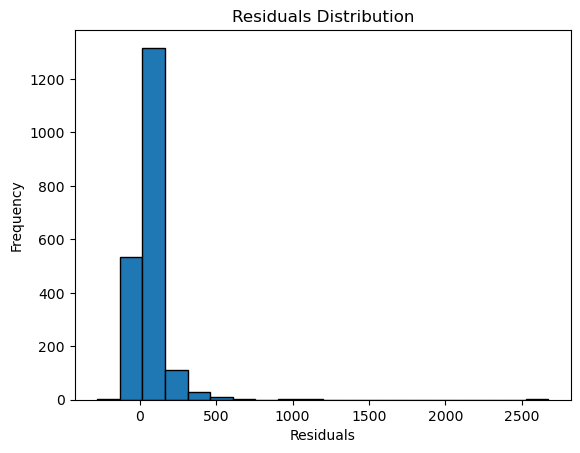

In [441]:
y_pred = best_model.predict(X_test)
residuals = y_test - y_pred
plt.hist(residuals, bins=20, edgecolor='k')
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [461]:
# Select a row from the test set
sample_index = 0  # Replace with the desired index
sample_features = X_test[sample_index]
true_price = y_test[sample_index]

# Predict the price
predicted_price = best_model.predict([sample_features])[0]

print(f"True Price: {true_price}")
print(f"Predicted Price: {predicted_price}")


True Price: 150
Predicted Price: 32.92934036254883


In [463]:
residuals = y_test - best_model.predict(X_test)
print("Mean Residual:", np.mean(residuals))
print("Residual for sample_index 0:", residuals[0])


Mean Residual: 60.568704691600516
Residual for sample_index 0: 117.52924346923828


In [475]:
import numpy as np
import pandas as pd

# Convert y_test to a DataFrame and reset its index to ensure alignment
y_test_reset = y_test.reset_index(drop=True)

# Convert y_pred and residuals to pandas Series (with same index as y_test_reset)
y_pred_series = pd.Series(y_pred, index=y_test_reset.index)
residuals_series = pd.Series(residuals, index=y_test_reset.index)




In [477]:
# Identify outlier indices based on the residual threshold
outlier_indices = np.where(abs(residuals_series) > threshold)[0]

# Create a DataFrame for the outliers
outliers = pd.DataFrame({
    'Actual': y_test_reset.iloc[outlier_indices],  # Align by positional indices
    'Predicted': y_pred_series.iloc[outlier_indices],  # Align by positional indices
    'Residual': residuals_series.iloc[outlier_indices]  # Align by positional indices
})

# Print the results
print(f"Number of Outliers: {len(outliers)}")
print(outliers.head())

Number of Outliers: 9
     Actual  Predicted    Residual
31       56  32.470757  338.035500
39      200  32.470757  323.035500
231      80  32.470757  383.975731
631      72  32.470757  387.529243
903      42  32.470757  308.300083


In [487]:
# Extract rows from X_test using standard numpy indexing
outlier_features = X_test[outlier_indices]

print(outlier_features)


[[-0.3863004  -0.50736404 -0.71782867 ... -0.01116013  0.
  -0.01116013]
 [ 1.84207633  1.51704998  1.8053336  ... -0.01116013  0.
  -0.01116013]
 [-0.25128    -0.50736404 -0.71782867 ... -0.01116013  0.
  -0.01116013]
 ...
 [-0.54292407 -0.50736404  1.8053336  ... -0.01116013  0.
  -0.01116013]
 [ 0.55452177  0.50484297 -0.71782867 ... -0.01116013  0.
  -0.01116013]
 [-0.19295118 -0.50736404  0.54375247 ... -0.01116013  0.
  -0.01116013]]


In [491]:
# Assuming 'scaler' is the instance of StandardScaler used earlier
original_outlier_features = sc.inverse_transform(outlier_features)

print(original_outlier_features)


[[1.135e+03 2.000e+00 1.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [3.198e+03 4.000e+00 3.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [1.260e+03 2.000e+00 1.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 ...
 [9.900e+02 2.000e+00 3.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.006e+03 3.000e+00 1.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [1.314e+03 2.000e+00 2.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]]


In [495]:
similar_samples = X[(X['bath'] == 2) & (X['total_sqft'] == 1056) & (X['bhk'] == 2)]
similar_samples


total_sqft  bath  balcony  bhk  availability_14-Nov  \
116         1056     2        1    2                    0   
2862        1056     2        1    2                    0   
3409        1056     2        1    2                    0   
3465        1056     2        1    2                    0   
3485        1056     2        1    2                    0   
7331        1056     2        2    2                    0   
8664        1056     2        2    2                    0   
8708        1056     2        2    2                    0   
8749        1056     2        2    2                    0   
8758        1056     2        1    2                    0   

      availability_15-Aug  availability_15-Dec  availability_15-Jun  \
116                     0                    0                    0   
2862                    0                    0                    0   
3409                    0                    0                    0   
3465                    0                    0                    0   
3485                    0                    0                    0   
7331                    0                    0                    0   
8664                    0                    0                    0   
8708                    0                    0                    0   
8749                    0                    0                    0   
8758                    0                    0                    0   

      availability_15-Nov  availability_15-Oct  availability_16-Dec  \
116                     0                    0                    0   
2862                    0                    0                    0   
3409                    0                    0                    0   
3465                    0                    0                    0   
3485                    0                    0                    0   
7331                    0                    0                    0   
8664                    0                    0                    0   
8708                    0                    0                    0   
8749                    0                    0                    0   
8758                    0                    0                    0   

      availability_16-Jan  availability_16-Jul  availability_16-Mar  \
116                     0                    0                    0   
2862                    0                    0                    0   
3409                    0                    0                    0   
3465                    0                    0                    0   
3485                    0                    0                    0   
7331                    0                    0                    0   
8664                    0                    0                    0   
8708                    0                    0                    0   
8749                    0                    0                    0   
8758                    0                    0                    0   

      availability_16-Nov  availability_16-Oct  availability_16-Sep  \
116                     0                    0                    0   
2862                    0                    0                    0   
3409                    0                    0                    0   
3465                    0                    0                    0   
3485                    0                    0                    0   
7331                    0                    0                    0   
8664                    0                    0                    0   
8708                    0                    0                    0   
8749                    0                    0                    0   
8758                    0                    0                    0   

      availability_17-Apr  availability_17-Aug  availability_17-Dec  \
116                     0                    0                    0   
2862                    0                    0                  

In [497]:
print("R^2 Score:", best_model.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, best_model.predict(X_test))))


R^2 Score: -0.2000769339761006
RMSE: 119.02583593201906


In [499]:
# Prediction function
def predict_house_price(model, features):
    """
    Predict house price given a model and feature values.
    
    :param model: Trained XGBoost model
    :param features: Dictionary of feature values
    :return: Predicted house price
    """
    # Create a zero array for features
    x = np.zeros(len(X.columns))

    # Fill in feature values
    x[0] = features['bath']
    x[1] = features['total_sqft']
    x[2] = features['bhk']

    # Handle categorical features
    location_column = 'location_' + features['location']
    if location_column in X.columns:
        location_index = np.where(X.columns == location_column)[0][0]
        x[location_index] = 1
    else:
        raise ValueError(f"Location '{features['location']}' not found in training data.")

    # Standardize the feature array
    x = sc.transform(pd.DataFrame([x], columns=X.columns))

    # Predict and return the house price
    return model.predict(x)[0]

In [501]:
# Example usage
try:
    sample_features = {
        'bath': 3,
        'total_sqft': 1750,
        'bhk': 3,
        'location': 'Rajaji Nagar'
    }
    predicted_price = predict_house_price(best_model, sample_features)
    print("Predicted House Price:", predicted_price)
except Exception as e:
    print("Error:", e)

Predicted House Price: 121.634285


In [501]:
# Example usage
try:
    sample_features = {
        'bath': 3,
        'total_sqft': 1750,
        'bhk': 3,
        'location': 'Rajaji Nagar'
    }
    predicted_price = predict_house_price(best_model, sample_features)
    print("Predicted House Price:", predicted_price)
except Exception as e:
    print("Error:", e)

Predicted House Price: 121.634285


In [503]:
# Remove outliers based on residuals
y_pred = best_model.predict(X_train)
residuals = y_train - y_pred
threshold = 3 * np.std(residuals)
inliers = np.abs(residuals) <= threshold

In [505]:
# Filter training data
X_train = X_train[inliers]
y_train = y_train[inliers]

print(f"Removed {np.sum(~inliers)} outliers.")

Removed 151 outliers.


In [507]:
# Refit the model on updated training data
best_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [509]:
# Evaluate the refitted model on the test data
test_score = best_model.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, best_model.predict(X_test)))
print("Updated Test Score (R^2):", test_score)
print("Updated RMSE:", rmse)

Updated Test Score (R^2): 0.49018903743357156
Updated RMSE: 77.57848264387407


In [515]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

# Define base models
base_models = [
    ('xgb', xgb.XGBRegressor(**best_params)),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
]

# Define meta-model
stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator=Ridge()
)

# Fit stacking model
stacking_model.fit(X_train, y_train)




StackingRegressor(estimators=[('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.7, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=0.2,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.05, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=6,
                                            max_leaves=None, min_child_weight=1,
                                            missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=300, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                              ('rf', RandomForestRegressor(random_state=42))],
                  final_estimator=Ridge())

In [516]:
# Evaluate stacking model
stacking_test_score = stacking_model.score(X_test, y_test)
stacking_rmse = np.sqrt(mean_squared_error(y_test, stacking_model.predict(X_test)))

print("Stacking Test Score (R^2):", stacking_test_score)
print("Stacking RMSE:", stacking_rmse)

Stacking Test Score (R^2): 0.5032762010044687
Stacking RMSE: 76.57626506097974


In [519]:
from sklearn.ensemble import VotingRegressor

voting_model = VotingRegressor(estimators=[
    ('xgb', xgb.XGBRegressor(**best_params)),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Fit voting regressor
voting_model.fit(X_train, y_train)

VotingRegressor(estimators=[('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.7, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=0.2, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0.05, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=6,
                                          max_leaves=None, min_child_weight=1,
                                          missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=300,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=None, ...)),
                            ('rf', RandomForestRegressor(random_state=42))])

In [520]:
# Evaluate voting regressor
voting_test_score = voting_model.score(X_test, y_test)
voting_rmse = np.sqrt(mean_squared_error(y_test, voting_model.predict(X_test)))

print("Voting Test Score (R^2):", voting_test_score)
print("Voting RMSE:", voting_rmse)

Voting Test Score (R^2): 0.4905006048704803
Voting RMSE: 77.55477324482763


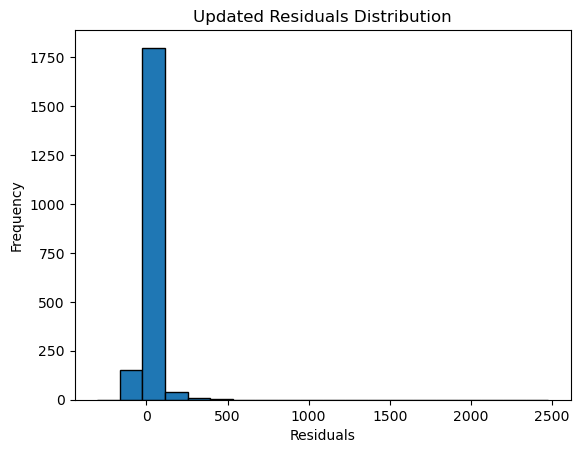

In [523]:
# Recalculate residuals
y_pred = best_model.predict(X_test)
residuals = y_test - y_pred

# Plot updated residual histogram
plt.hist(residuals, bins=20, edgecolor='k')
plt.title("Updated Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


In [525]:
# Remove outliers based on residuals
best_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_train)
residuals = y_train - y_pred
threshold = 3 * np.std(residuals)
inliers = np.abs(residuals) <= threshold

In [527]:
# Filter training data
X_train = X_train[inliers]
y_train = y_train[inliers]
print(f"Removed {np.sum(~inliers)} outliers.")

Removed 178 outliers.


In [529]:
# Refit the XGBoost model after outlier removal
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

In [531]:
# Hyperparameter grid for RandomizedSearchCV
param_distributions = {
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.5],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'n_estimators': [100, 200, 300, 400, 500]
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_distributions,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the randomized search
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 0.9,
                                                             1.0],
                                        'gamma': [0, 0.1, 0.2, 0.5],
                                        'learning_rate': [0.01, 0.03, 0.05, 0.1,
                                                          0.2],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [532]:
# Best parameters and model
best_params = random_search.best_params_
print("Best Parameters:", best_params)

best_model = random_search.best_estimator_

Best Parameters: {'subsample': 0.8, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.9}


In [533]:
# Evaluate on test data
test_score = best_model.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, best_model.predict(X_test)))
print("Updated Test Score (R^2):", test_score)
print("Updated RMSE:", rmse)

Updated Test Score (R^2): 0.4943333746208882
Updated RMSE: 77.26251507123708


In [537]:
# Cross-validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Cross-Validation Scores: [0.86481946 0.8815646  0.8635683  0.86659375 0.86950987]
Mean CV Score: 0.8692111951692579


In [539]:
# Prediction function
def predict_house_price(model, features):
    """
    Predict house price given a model and feature values.
    
    :param model: Trained XGBoost model
    :param features: Dictionary of feature values
    :return: Predicted house price
    """
    # Create a zero array for features
    x = np.zeros(len(X.columns))

    # Fill in feature values
    x[0] = features['bath']
    x[1] = features['total_sqft']
    x[2] = features['bhk']

    # Handle categorical features
    location_column = 'location_' + features['location']
    if location_column in X.columns:
        location_index = np.where(X.columns == location_column)[0][0]
        x[location_index] = 1
    else:
        raise ValueError(f"Location '{features['location']}' not found in training data.")

    # Standardize the feature array
    x = sc.transform(pd.DataFrame([x], columns=X.columns))

    # Predict and return the house price
    return model.predict(x)[0]

In [543]:
# Example usage
try:
    sample_features = {
        'bath': 3,
        'total_sqft': 1750,
        'bhk': 3,
        'location': 'Rajaji Nagar'
    }
    predicted_price = predict_house_price(best_model, sample_features)
    print("Predicted House Price:", predicted_price)
except Exception as e:
    print("Error:", e)

Predicted House Price: 71.63942


In [547]:
# Example usage
try:
    sample_features = {
        'bath': 2,
        'total_sqft': 1056,
        'bhk': 2,
        'location': 'Electronic City Phase II'
    }
    predicted_price = predict_house_price(best_model, sample_features)
    print("Predicted House Price:", predicted_price)
except Exception as e:
    print("Error:", e)

Predicted House Price: 52.39082


In [549]:
# Example usage
try:
    sample_features = {
        'bath': 3,
        'total_sqft': 1056,
        'bhk': 3,
        'location': 'Electronic City Phase II'
    }
    predicted_price = predict_house_price(best_model, sample_features)
    print("Predicted House Price:", predicted_price)
except Exception as e:
    print("Error:", e)

Predicted House Price: 57.254128


In [555]:
# Testing predictions on known dataset values
try:
    # Select a row from the test set
    sample_index = 1  # Replace with the desired index
    sample_features = {
        'bath': X.iloc[sample_index]['bath'],
        'total_sqft': X.iloc[sample_index]['total_sqft'],
        'bhk': X.iloc[sample_index]['bhk'],
        'location': X.iloc[sample_index].filter(like='location_').idxmax().replace('location_', '')
    }
    true_price = y.iloc[sample_index]

    # Predict the price
    predicted_price = predict_house_price(best_model, sample_features)

    print(f"True Price: {true_price}")
    print(f"Predicted Price: {predicted_price}")
except Exception as e:
    print("Error:", e)


True Price: 149
Predicted Price: 59.348201751708984


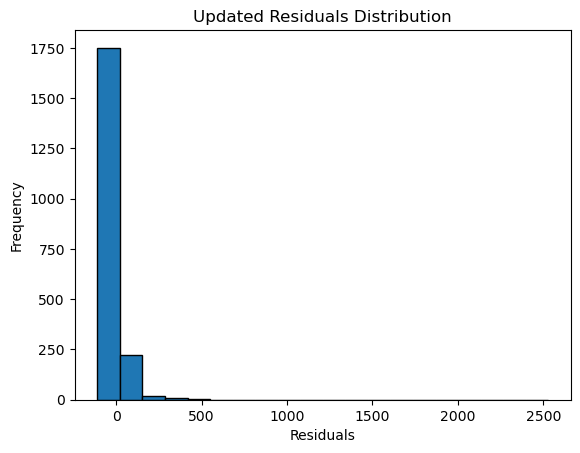

In [557]:
# Updated Residual Distribution
y_pred = best_model.predict(X_test)
residuals = y_test - y_pred
plt.hist(residuals, bins=20, edgecolor='k')
plt.title("Updated Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


In [559]:
print(X['balcony'].corr(y))

0.10521959089219035
